# Oscilador de Morse

Importamos bibliotecas varias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.polynomial.hermite import hermval
%matplotlib inline

Definimos los parámetros de la simulación, el número de puntos en la grilla, los límites izquierdo y derecho, calculamos $\Delta x$, definimos $\hbar$, la masa, la constante de fuerza. $t$ es $\frac{\hbar^2}{2m}\frac{1}{(\Delta x)^2}$

In [2]:
ngrid = 101
xmin = 0.5
xmax =  15.0
deltax = (xmax - xmin) / float(ngrid-1)
hbar = 1.0
mass = 1.7
k = 2.3
t = hbar**2 / (2.0 * mass * deltax**2)

Grilla en el espacio real entre los límites

In [3]:
xgrid = np.linspace(xmin, xmax, ngrid)

$\delta_{ij}$ la delta de Kronecker

In [4]:
def kdelta(k, l):
    if k == l: return True
    else: return False

La función potencial ahora es $D (1-e^{-a (r-r_e)})$, con $D$ la energía de disociación, $a$ una epecie de constante de fuerza y $r_e$ la posición de equilibrio

In [5]:
re = 3.0
D = 5.0
a = 1.0

def V(r):
    return D * (1.0 - np.exp(-a * (r-re)))**2

Definimos el operador Hamiltoniano

In [6]:
H = np.zeros((ngrid,ngrid))
for i in range(0,ngrid):
    for j in range(0,ngrid):
        if kdelta(i,j+1):
            H[i,j] = - t / 1.0
        if kdelta(i,j-1):
            H[i,j] = - t / 1.0 
        if kdelta(i,j):
            H[i,j] = 2.0 * t + V(xgrid[i])

Diagonalizamos y obtenemos autovalores y autovectores

In [7]:
evals, evecs = np.linalg.eigh(H)

El potencial

(1.0, 15.0)

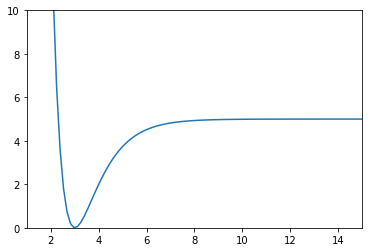

In [8]:
plt.plot(xgrid,V(xgrid))
plt.ylim([0,10])
plt.xlim([1.0,15.0])

La probabilidad en el estado fundamental y el primer estado excitado

(1.0, 15)

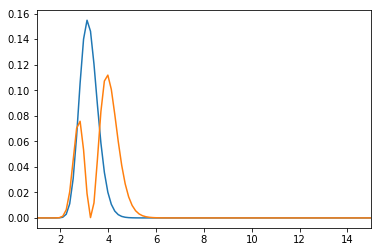

In [9]:
plt.plot(xgrid,evecs[:,0]**2)
plt.plot(xgrid,evecs[:,1]**2)
plt.xlim([1.0,15])

La función de onda en el estado fundamental y el primer estado excitado

(1.0, 15)

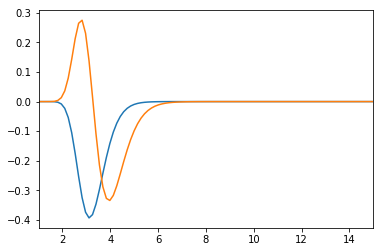

In [10]:
plt.plot(xgrid,evecs[:,0])
plt.plot(xgrid,evecs[:,1])
plt.xlim([1.0,15])

El autovalor de los primeros cinco estados

In [11]:
evals[0:10]

array([ 1.1335741 ,  2.95971763,  4.20409362,  4.87418264,  5.03633088,
        5.14273332,  5.30438835,  5.51248837,  5.76254698,  6.05165064])

¿Qué pasa acá?

(1.0, 15)

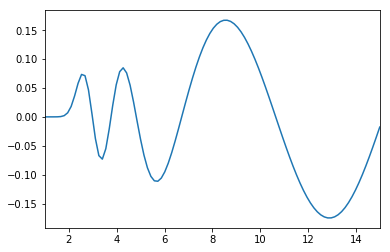

In [12]:
plt.plot(xgrid,evecs[:,5])
plt.xlim([1.0,15])